EM algorithm

In [1]:
import scipy.stats as sts
import math
%matplotlib inline

import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [2]:
from IPython.display import Image

In [3]:
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom

In [4]:
plt.rcParams['figure.figsize'] = [13, 10]
plt.figure(figsize=(3,3))

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [5]:
df=pd.read_csv('RI.IMOEX_171001_181001.csv', sep=';')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,RI.IMOEX,60,20171002,11:00:00,"2,077.1600000","2,083.4300000","2,075.4700000","2,082.2700000","4,556,962,523"
1,RI.IMOEX,60,20171002,12:00:00,"2,082.2800000","2,083.3400000","2,080.5500000","2,081.8700000","3,062,097,860"
2,RI.IMOEX,60,20171002,13:00:00,"2,081.8000000","2,082.5800000","2,080.5200000","2,082.1800000","1,596,281,539"
3,RI.IMOEX,60,20171002,14:00:00,"2,082.1900000","2,082.9800000","2,080.1300000","2,080.4400000","1,276,319,701"
4,RI.IMOEX,60,20171002,15:00:00,"2,080.4400000","2,081.8100000","2,076.7200000","2,078.6100000","1,863,008,736"
5,RI.IMOEX,60,20171002,16:00:00,"2,078.5900000","2,079.5800000","2,075.8600000","2,077.0600000","2,456,897,281"
6,RI.IMOEX,60,20171002,17:00:00,"2,077.0500000","2,077.9700000","2,074.6600000","2,075.8500000","3,305,974,565"
7,RI.IMOEX,60,20171002,18:00:00,"2,075.7700000","2,077.2400000","2,072.8800000","2,073.5000000","2,899,729,946"
8,RI.IMOEX,60,20171002,19:00:00,"2,073.5400000","2,077.1400000","2,072.7200000","2,075.7200000","2,764,064,133"
9,RI.IMOEX,60,20171003,11:00:00,"2,076.5300000","2,082.0800000","2,075.3600000","2,080.4500000","6,349,590,146"


In [6]:
def strtofloat(s):
    s = s.replace(",","")
    return float(s)

In [7]:
data = np.array([])
prevopen = 0
for index,row in df.iterrows():
    if prevopen != 0:
        data =np.append(data, strtofloat(row[4])-prevopen)
    prevopen = strtofloat(row[4])
data = np.append(data,strtofloat(df.iloc[-1][7])-prevopen)

In [8]:
data

array([5.120, -0.480, 0.390, ..., -10.840, 2.410, 7.030])

In [9]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*sts.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*sts.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*sts.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

In [10]:
f(np.arange(3), np.arange(3))

array([0.017, 0.012, 0.023])

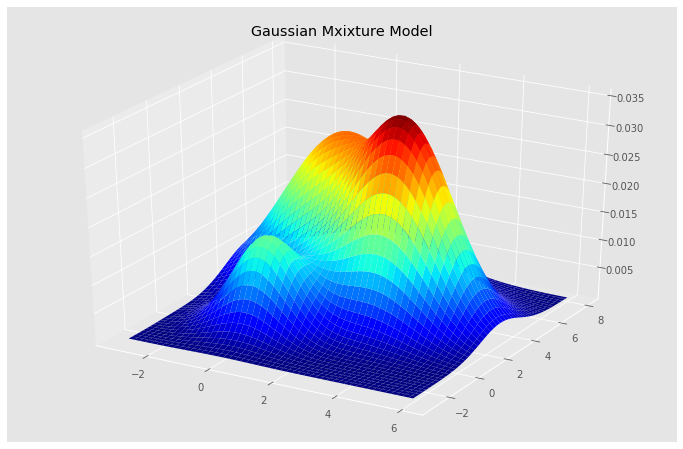

In [11]:
s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [12]:
from scipy.stats import multivariate_normal as mvn

In [31]:
def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    #n, p = xs.shape
    n=len(xs)
    p=1
    
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [48]:
# initial guesses for parameters
pis = np.random.random(1)
pis /= pis.sum()
mus = np.random.random((2,1))
sigmas = np.array([np.eye(1)] * 2)
pis

array([1.000])

In [49]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])
xs

array([[-1.880, 4.705],
       [0.490, 2.935],
       [-1.002, 5.168],
       ...,
       [-1.154, 2.613],
       [-2.359, -1.584],
       [-1.986, -2.276]])

In [50]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

ValueError: setting an array element with a sequence.